# Cirrhosis Stage Prediction

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. 

Here, we will predict the stage of cirrhosis using different biomarkers as below.
* Status
* Drug             
* Age              
* Sex              
* Ascites          
* Hepatomegaly     
* Spiders          
* Edema
* Bilirubin 
* Cholesterol 
* Albumin            
* Copper           
* Alk_Phos         
* SGOT             
* Tryglicerides    
* Platelets        
* Prothrombin      
* Stage          

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd

## Dataset Import

In [ ]:
# dataset_link = "https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset"
cir = pd.read_csv('/content/cirrhosis.csv')
cir.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [ ]:
cir.describe().T.style.background_gradient(cmap = 'BuGn')

Feature Scaling is required

## Do we need any kind of encoding let's see the value counts on categorical features.
 

In [ ]:
j = [2, 5, 6 ,7, 8, 9]
for i in (j):
  print(f"Value count for {cir.columns[i]} is \n", cir.iloc[:, i].value_counts(), "\n\n")

Value count for Status is 
 C     232
D     161
CL     25
Name: Status, dtype: int64 


Value count for Sex is 
 F    374
M     44
Name: Sex, dtype: int64 


Value count for Ascites is 
 N    288
Y     24
Name: Ascites, dtype: int64 


Value count for Hepatomegaly is 
 Y    160
N    152
Name: Hepatomegaly, dtype: int64 


Value count for Spiders is 
 N    222
Y     90
Name: Spiders, dtype: int64 


Value count for Edema is 
 N    354
S     44
Y     20
Name: Edema, dtype: int64 




### Ok we need one hot encoding on some and label encoding on other some. 
## But now let's see how much nan value do we have... hmmm

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


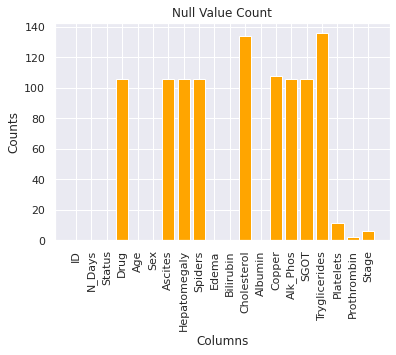

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [ ]:
null_count = cir.isna().sum()
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")

sns.set()
print(null_count.index)
plt.bar(x = null_count.index, height = null_count, color = 'orange')
plt.xticks(rotation = 90)
plt.title('Null Value Count')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.show()

print(null_count)

## How much unbalanced is our data??

Stage
1.0     21
2.0     92
3.0    155
4.0    144
dtype: int64


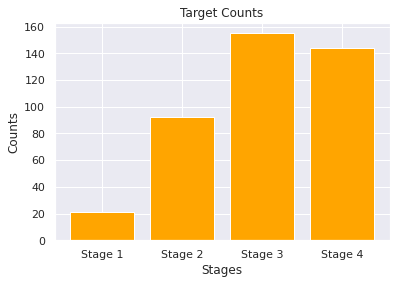

In [ ]:
counts = cir.groupby('Stage').size()
print(counts)
plt.bar(x = counts.index, height = counts, color = 'orange')
plt.xticks(rotation = 90)
plt.title('Target Counts')
plt.xlabel('Stages')
plt.ylabel('Counts')
plt.xticks([1,2,3,4], ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], rotation = 0)
plt.show()

## So much of unbalance.

Hmm nice now before oversampling let's complete eda.
# How unique is our data in categorical features?

In [ ]:
unique_hepa = cir['Hepatomegaly'].unique()
unique_acites = cir['Ascites'].unique()
unique_spi = cir['Spiders'].unique()
unique_edema = cir['Edema'].unique()

print(unique_hepa, unique_acites, unique_spi, unique_edema)
# unique_acites = cir['Acites'].unique()

['Y' 'N' nan] ['Y' 'N' nan] ['Y' 'N' nan] ['Y' 'N' 'S']


## Nice now let's label encode and one hot encode the dataset.

In [ ]:

cir['Hepatomegaly'] = cir['Hepatomegaly'].apply(lambda x : 1 if x == 'Y' else (0 if x == 'N' else np.nan))
cir['Ascites'] = cir['Ascites'].apply(lambda x : 1 if x == 'Y' else (0 if x == 'N' else np.nan))
cir['Sex'] = cir['Sex'].apply(lambda x : 1 if x == 'F' else (0 if x == 'M' else np.nan))
cir['Spiders'] = cir['Spiders'].apply(lambda x : 1 if x == 'Y' else (0 if x == 'N' else np.nan))

cir['EdemaY'] = cir['Edema'].apply(lambda x : 1 if x == 'Y' else 0) # no nan value at edema
cir['EdemaN'] = cir['Edema'].apply(lambda x : 1 if x == 'N' else 0)
cir['EdemaS'] = cir['Edema'].apply(lambda x : 1 if x == 'S' else 0)

cir['StatusC'] = cir['Status'].apply(lambda x : 1 if x == 'C' else 0) # no nan value at edema
cir['StatusD'] = cir['Status'].apply(lambda x : 1 if x == 'D' else 0)
cir['StatusCL'] = cir['Status'].apply(lambda x : 1 if x == 'CL' else 0)

cir['Drug'] = cir['Drug'].apply(lambda x : 1 if x == 'D-penicillamine' else (0 if x == 'Placebo' else np.nan)) 


cir = cir.drop(['Status', 'Edema'], axis = 1)

In [ ]:
cir.dropna(subset=['Stage'],inplace = True, axis = 0)
cir.head()

ID  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0   1     400   1.0  21464    1      1.0           1.0      1.0       14.5   
1   2    4500   1.0  20617    1      0.0           1.0      1.0        1.1   
2   3    1012   1.0  25594    0      0.0           0.0      0.0        1.4   
3   4    1925   1.0  19994    1      0.0           1.0      1.0        1.8   
4   5    1504   0.0  13918    1      0.0           1.0      1.0        3.4   

   Cholesterol  ...  Tryglicerides  Platelets  Prothrombin  Stage  EdemaY  \
0        261.0  ...          172.0      190.0         12.2    4.0       1   
1        302.0  ...           88.0      221.0         10.6    3.0       0   
2        176.0  ...           55.0      151.0         12.0    4.0       0   
3        244.0  ...           92.0      183.0         10.3    4.0       0   
4        279.0  ...           72.0      136.0         10.9    3.0       0   

   EdemaN  EdemaS  StatusC  StatusD  StatusCL  
0       0       0        0        1         0  
1       1       0        1        0         0  
2       0       1        0        1         0  
3       0       1        0        1         0  
4       1       0        0        0         1  

[5 rows x 24 columns]

In [ ]:
cir['Drug'].value_counts()

1.0    158
0.0    154
Name: Drug, dtype: int64

## Imputing

### Now since our data has so many null values too. Let's do imputing using bayesian Ridge so since being a medical dataset, features must be related to each others.

In [ ]:
cir.columns

Index(['ID', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'EdemaY',
       'EdemaN', 'EdemaS', 'StatusC', 'StatusD', 'StatusCL'],
      dtype='object')

In [ ]:
cir_imputer = cir[['ID', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'EdemaY',
       'EdemaN', 'EdemaS', 'StatusC', 'StatusD', 'StatusCL']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Multivariate imputation for train data
imputer_train = IterativeImputer(estimator = BayesianRidge(), max_iter=10, random_state=0) 

In [ ]:
imputer_train.fit(cir_imputer)

imputed_data = pd.DataFrame(imputer_train.transform(cir_imputer), columns = cir_imputer.columns)
imputed_data.head()

ID  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0  1.0   1.0  21464.0  1.0      1.0           1.0      1.0       14.5   
1  2.0   1.0  20617.0  1.0      0.0           1.0      1.0        1.1   
2  3.0   1.0  25594.0  0.0      0.0           0.0      0.0        1.4   
3  4.0   1.0  19994.0  1.0      0.0           1.0      1.0        1.8   
4  5.0   0.0  13918.0  1.0      0.0           1.0      1.0        3.4   

   Cholesterol  Albumin  ...  Tryglicerides  Platelets  Prothrombin  Stage  \
0        261.0     2.60  ...          172.0      190.0         12.2    4.0   
1        302.0     4.14  ...           88.0      221.0         10.6    3.0   
2        176.0     3.48  ...           55.0      151.0         12.0    4.0   
3        244.0     2.54  ...           92.0      183.0         10.3    4.0   
4        279.0     3.53  ...           72.0      136.0         10.9    3.0   

   EdemaY  EdemaN  EdemaS  StatusC  StatusD  StatusCL  
0     1.0     0.0     0.0      0.0      1.0       0.0  
1     0.0     1.0     0.0      1.0      0.0       0.0  
2     0.0     0.0     1.0      0.0      1.0       0.0  
3     0.0     0.0     1.0      0.0      1.0       0.0  
4     0.0     1.0     0.0      0.0      0.0       1.0  

[5 rows x 23 columns]

In [ ]:
imputed_data.isna().sum()

ID               0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
EdemaY           0
EdemaN           0
EdemaS           0
StatusC          0
StatusD          0
StatusCL         0
dtype: int64

In [ ]:
imputed_combined_data = pd.concat([cir['N_Days'], imputed_data], axis = 1)
imputed_combined_data.head()

N_Days   ID  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0   400.0  1.0   1.0  21464.0  1.0      1.0           1.0      1.0       14.5   
1  4500.0  2.0   1.0  20617.0  1.0      0.0           1.0      1.0        1.1   
2  1012.0  3.0   1.0  25594.0  0.0      0.0           0.0      0.0        1.4   
3  1925.0  4.0   1.0  19994.0  1.0      0.0           1.0      1.0        1.8   
4  1504.0  5.0   0.0  13918.0  1.0      0.0           1.0      1.0        3.4   

   Cholesterol  ...  Tryglicerides  Platelets  Prothrombin  Stage  EdemaY  \
0        261.0  ...          172.0      190.0         12.2    4.0     1.0   
1        302.0  ...           88.0      221.0         10.6    3.0     0.0   
2        176.0  ...           55.0      151.0         12.0    4.0     0.0   
3        244.0  ...           92.0      183.0         10.3    4.0     0.0   
4        279.0  ...           72.0      136.0         10.9    3.0     0.0   

   EdemaN  EdemaS  StatusC  StatusD  StatusCL  
0     0.0     0.0      0.0      1.0       0.0  
1     1.0     0.0      1.0      0.0       0.0  
2     0.0     1.0      0.0      1.0       0.0  
3     0.0     1.0      0.0      1.0       0.0  
4     1.0     0.0      0.0      0.0       1.0  

[5 rows x 24 columns]

In [ ]:
imputed_combined_data.isna().sum()
print(cir.shape, imputed_data.shape, imputed_combined_data.shape)

(412, 24) (412, 23) (418, 24)


## Okay no null value now.

In [ ]:
imputed_data['Drug'].value_counts() ##f

1.000000    158
0.000000    154
0.538020      1
0.553158      1
0.679670      1
           ... 
0.560654      1
0.550662      1
0.677444      1
0.526144      1
0.574053      1
Name: Drug, Length: 102, dtype: int64

## the categorical data has moved to be a floating dataset due to imputing let's give them defalut thresold to distinguish the category.

In [ ]:
imputed_data['Hepatomegaly'] = imputed_data['Hepatomegaly'].apply(lambda x : 1 if x >= 0.5 else 0)
imputed_data['Ascites'] = imputed_data['Ascites'].apply(lambda x : 1 if x >= 0.5 else 0)
imputed_data['Sex'] = imputed_data['Sex'].apply(lambda x : 1 if x >= 0.5 else 0)
imputed_data['Spiders'] = imputed_data['Spiders'].apply(lambda x : 1 if x >= 0.5 else 0)
imputed_data['Drug'] = imputed_data['Drug'].apply(lambda x : 1 if x >= 0.5 else 0) 

In [ ]:
## normalizing dataset first
imputed_data.head()

ID  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0  1.0     1  21464.0    1        1             1        1       14.5   
1  2.0     1  20617.0    1        0             1        1        1.1   
2  3.0     1  25594.0    0        0             0        0        1.4   
3  4.0     1  19994.0    1        0             1        1        1.8   
4  5.0     0  13918.0    1        0             1        1        3.4   

   Cholesterol  Albumin  ...  Tryglicerides  Platelets  Prothrombin  Stage  \
0        261.0     2.60  ...          172.0      190.0         12.2    4.0   
1        302.0     4.14  ...           88.0      221.0         10.6    3.0   
2        176.0     3.48  ...           55.0      151.0         12.0    4.0   
3        244.0     2.54  ...           92.0      183.0         10.3    4.0   
4        279.0     3.53  ...           72.0      136.0         10.9    3.0   

   EdemaY  EdemaN  EdemaS  StatusC  StatusD  StatusCL  
0     1.0     0.0     0.0      0.0      1.0       0.0  
1     0.0     1.0     0.0      1.0      0.0       0.0  
2     0.0     0.0     1.0      0.0      1.0       0.0  
3     0.0     0.0     1.0      0.0      1.0       0.0  
4     0.0     1.0     0.0      0.0      0.0       1.0  

[5 rows x 23 columns]

## Okay everything seems fine now. But now let's normalize them as the numerical range data of the fetures seems so biased which can lead to skewness/bias in model.


## Normalization

In [ ]:
imputed_data.drop(['ID'], inplace = True, axis = 1)

In [ ]:
X = imputed_data.drop(['Stage'], axis = 1)
y = imputed_data['Stage']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 72, test_size = 0.2)

In [ ]:
print(X_train.size, X_test.size)

6909 1743


In [ ]:
X_train.head()

Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
391     1  22646.0    1        0             1        0        7.3   
44      0  15265.0    1        0             0        0        0.6   
33      1  19015.0    1        0             0        0        0.8   
151     1  25546.0    0        0             1        0        2.3   
364     1  18628.0    1        0             0        0        7.3   

     Cholesterol  Albumin      Copper  ...        SGOT  Tryglicerides  \
391   341.373504     3.49  116.063889  ...  119.769834     137.091957   
44    388.888007     3.93   19.000000  ...   71.300000     119.422459   
33    364.000000     3.70   37.000000  ...  170.500000      64.000000   
151   586.000000     3.01  243.000000  ...  114.700000     126.000000   
364   404.080858     3.52  109.558159  ...  124.523128     141.874434   

     Platelets  Prothrombin  EdemaY  EdemaN  EdemaS  StatusC  StatusD  \
391      189.0         10.9     0.0     1.0     0.0      1.0      0.0   
44       474.0         10.9     0.0     1.0     0.0      1.0      0.0   
33       273.0         10.5     0.0     1.0     0.0      1.0      0.0   
151      339.0         10.9     0.0     1.0     0.0      0.0      1.0   
364      265.0         11.1     0.0     0.0     1.0      0.0      1.0   

     StatusCL  
391       0.0  
44        0.0  
33        0.0  
151       0.0  
364       0.0  

[5 rows x 21 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
print(numeric_cols)

['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


In [ ]:
def scaler(model,df_train,df_test):
  model.fit(df_train)

  scaled_train = model.transform(df_train)
  scaled_test = model.transform(df_test)

  return scaled_train,scaled_test

In [ ]:
X_train[numeric_cols],X_test[numeric_cols] = scaler(StandardScaler(),X_train[numeric_cols],X_test[numeric_cols])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 72, test_size = 0.2)


## okay now let's make the dataset balanced using oversampling. let's make all of them of some fixed size. 

## SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( sampling_strategy={1: 160, 2: 160, 3: 160, 4: 160})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (160) in class 1 will be larger than the number of samples in the majority class (class #3.0 -> 79)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (160) in class 2 will be larger than the number of samples in the majority class (class #3.0 -> 79)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (160) in class 3 will be larger than the number of samples in the majority class (class #3.0 -> 79)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (160) in class 4 will be larger than the number of samples in the majority class (class #3.0 -> 79)
  warnings.warn(


In [ ]:
X_train_resampled.shape, y_train_resampled.shape

((640, 21), (640,))

In [ ]:
y_train_resampled.value_counts()

4.0    160
2.0    160
3.0    160
1.0    160
Name: Stage, dtype: int64

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

In [ ]:
def evaluate_model(y_train,y_pred_train,y_test,y_pred_test):
  print("Evaluation metrics for train set")
  # print('Recall is', recall_score(y_train,y_pred_train))
  # print('Precision score is', precision_score(y_train,y_pred_train))
  # print('F1 score is', f1_score(y_train,y_pred_train))
  # print('Accuracy is', accuracy_score(y_train,y_pred_train))
  print('Confusion Matrix is\n',confusion_matrix(y_train,y_pred_train),"/n")

  print("*"*20)

  print("Evaluation metrics for test set")
  # print('Recall is', recall_score(y_test,y_pred_test))
  # print('Precision score is', precision_score(y_test,y_pred_test))
  # print('F1 score is', f1_score(y_test,y_pred_test))
  # print('Accuracy is', accuracy_score(y_test,y_pred_test))
  print('Confusion Matrix is\n',confusion_matrix(y_test,y_pred_test),"/n")

## Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_un=LogisticRegression(max_iter=500)
log_reg_un.fit(X_train,y_train)
pred_log_train_un = log_reg_un.predict(X_train)
pred_log_test_un=log_reg_un.predict(X_val)

evaluate_model(y_train, pred_log_train_un, y_val, pred_log_test_un)
# print(y_train_resampled.shape, pred_log_train.shape, y_val.shape, pred_log_test.shape)

Evaluation metrics for train set
Confusion Matrix is
 [[ 4  3  6  0]
 [ 3 18 22  6]
 [ 1 10 53 15]
 [ 0  3 12 54]] /n
********************
Evaluation metrics for test set
Confusion Matrix is
 [[ 0  0  3  0]
 [ 1  4  9  1]
 [ 0  9  7  6]
 [ 0  1  2 10]] /n


In [ ]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(X_train_resampled,y_train_resampled)
pred_log_train = log_reg.predict(X_train_resampled)
pred_log_test=log_reg.predict(X_val)

evaluate_model(y_train_resampled, pred_log_train, y_val, pred_log_test)
# print(y_train_resampled.shape, pred_log_train.shape, y_val.shape, pred_log_test.shape)

Evaluation metrics for train set
Confusion Matrix is
 [[146   4  10   0]
 [ 14 106  29  11]
 [ 15  40  76  29]
 [  4   6  12 138]] /n
********************
Evaluation metrics for test set
Confusion Matrix is
 [[ 1  0  2  0]
 [ 7  3  3  2]
 [ 2 11  4  5]
 [ 0  1  2 10]] /n


In [ ]:
unique_values, counts = np.unique(pred_log_train, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print("Value: {}, Count: {}".format(value, count))

Value: 1.0, Count: 179
Value: 2.0, Count: 156
Value: 3.0, Count: 127
Value: 4.0, Count: 178


In [ ]:
confusion_matrix(y_val,pred_log_test)
print(accuracy_score(y_val,pred_log_test), accuracy_score(y_val, pred_log_test_un))
print(f1_score(y_val,pred_log_test, average = None), f1_score(y_val, pred_log_test_un, average = None))


0.33962264150943394 0.39622641509433965
[0.15384615 0.2        0.24242424 0.66666667] [0.         0.27586207 0.3255814  0.66666667]


In [ ]:
numeric_cols = list(X.select_dtypes(include=['float64']))
print(numeric_cols)

['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'EdemaY', 'EdemaN', 'EdemaS', 'StatusC', 'StatusD', 'StatusCL']


In [ ]:
def scaler(model,df_train,df_test):
  model.fit(df_train)

  scaled_train = model.transform(df_train)
  scaled_test = model.transform(df_test)

  return scaled_train,scaled_test

In [ ]:
X_train[numeric_cols],X_test[numeric_cols] = scaler(StandardScaler(),X_train[numeric_cols],X_test[numeric_cols])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 72, test_size = 0.2)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled.shape, y_train_resampled.shape

((244, 21), (244,))

In [ ]:
y_train_resampled.value_counts()

4.0    61
3.0    61
2.0    61
1.0    61
Name: Stage, dtype: int64

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

In [ ]:
def evaluate_model(y_train,y_pred_train,y_test,y_pred_test):
  print("Evaluation metrics for train set")
  # print('Recall is', recall_score(y_train,y_pred_train))
  # print('Precision score is', precision_score(y_train,y_pred_train))
  # print('F1 score is', f1_score(y_train,y_pred_train))
  # print('Accuracy is', accuracy_score(y_train,y_pred_train))
  print('Confusion Matrix is\n',confusion_matrix(y_train,y_pred_train),"/n")

  print("*"*20)

  print("Evaluation metrics for test set")
  # print('Recall is', recall_score(y_test,y_pred_test))
  # print('Precision score is', precision_score(y_test,y_pred_test))
  # print('F1 score is', f1_score(y_test,y_pred_test))
  # print('Accuracy is', accuracy_score(y_test,y_pred_test))
  print('Confusion Matrix is\n',confusion_matrix(y_test,y_pred_test),"/n")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_un=LogisticRegression(max_iter=500)
log_reg_un.fit(X_train,y_train)
pred_log_train_un = log_reg_un.predict(X_train)
pred_log_test_un=log_reg_un.predict(X_val)

evaluate_model(y_train, pred_log_train_un, y_val, pred_log_test_un)
# print(y_train_resampled.shape, pred_log_train.shape, y_val.shape, pred_log_test.shape)

Evaluation metrics for train set
Confusion Matrix is
 [[ 4  1  4  0]
 [ 1 17 15  6]
 [ 1 10 37 13]
 [ 0  4  9 46]] /n
********************
Evaluation metrics for test set
Confusion Matrix is
 [[0 1 3 0]
 [0 2 6 2]
 [0 4 9 5]
 [0 0 1 9]] /n


In [ ]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(X_train_resampled,y_train_resampled)
pred_log_train = log_reg.predict(X_train_resampled)
pred_log_test=log_reg.predict(X_val)

evaluate_model(y_train_resampled, pred_log_train, y_val, pred_log_test)
# print(y_train_resampled.shape, pred_log_train.shape, y_val.shape, pred_log_test.shape)

Evaluation metrics for train set
Confusion Matrix is
 [[58  2  1  0]
 [ 9 38  8  6]
 [ 4 16 29 12]
 [ 2  6  7 46]] /n
********************
Evaluation metrics for test set
Confusion Matrix is
 [[1 1 2 0]
 [1 2 5 2]
 [3 4 6 5]
 [0 0 1 9]] /n


In [ ]:
unique_values, counts = np.unique(pred_log_train, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print("Value: {}, Count: {}".format(value, count))

Value: 1.0, Count: 73
Value: 2.0, Count: 62
Value: 3.0, Count: 45
Value: 4.0, Count: 64


In [ ]:
confusion_matrix(y_val,pred_log_test)
print(accuracy_score(y_val,pred_log_test), accuracy_score(y_val, pred_log_test_un))
print(f1_score(y_val,pred_log_test, average = None), f1_score(y_val, pred_log_test_un, average = None))


0.42857142857142855 0.47619047619047616
[0.22222222 0.23529412 0.375      0.69230769] [0.         0.23529412 0.48648649 0.69230769]


### 🥲🥲🥲🥲🥲🥲

In [ ]:
import seaborn as sns


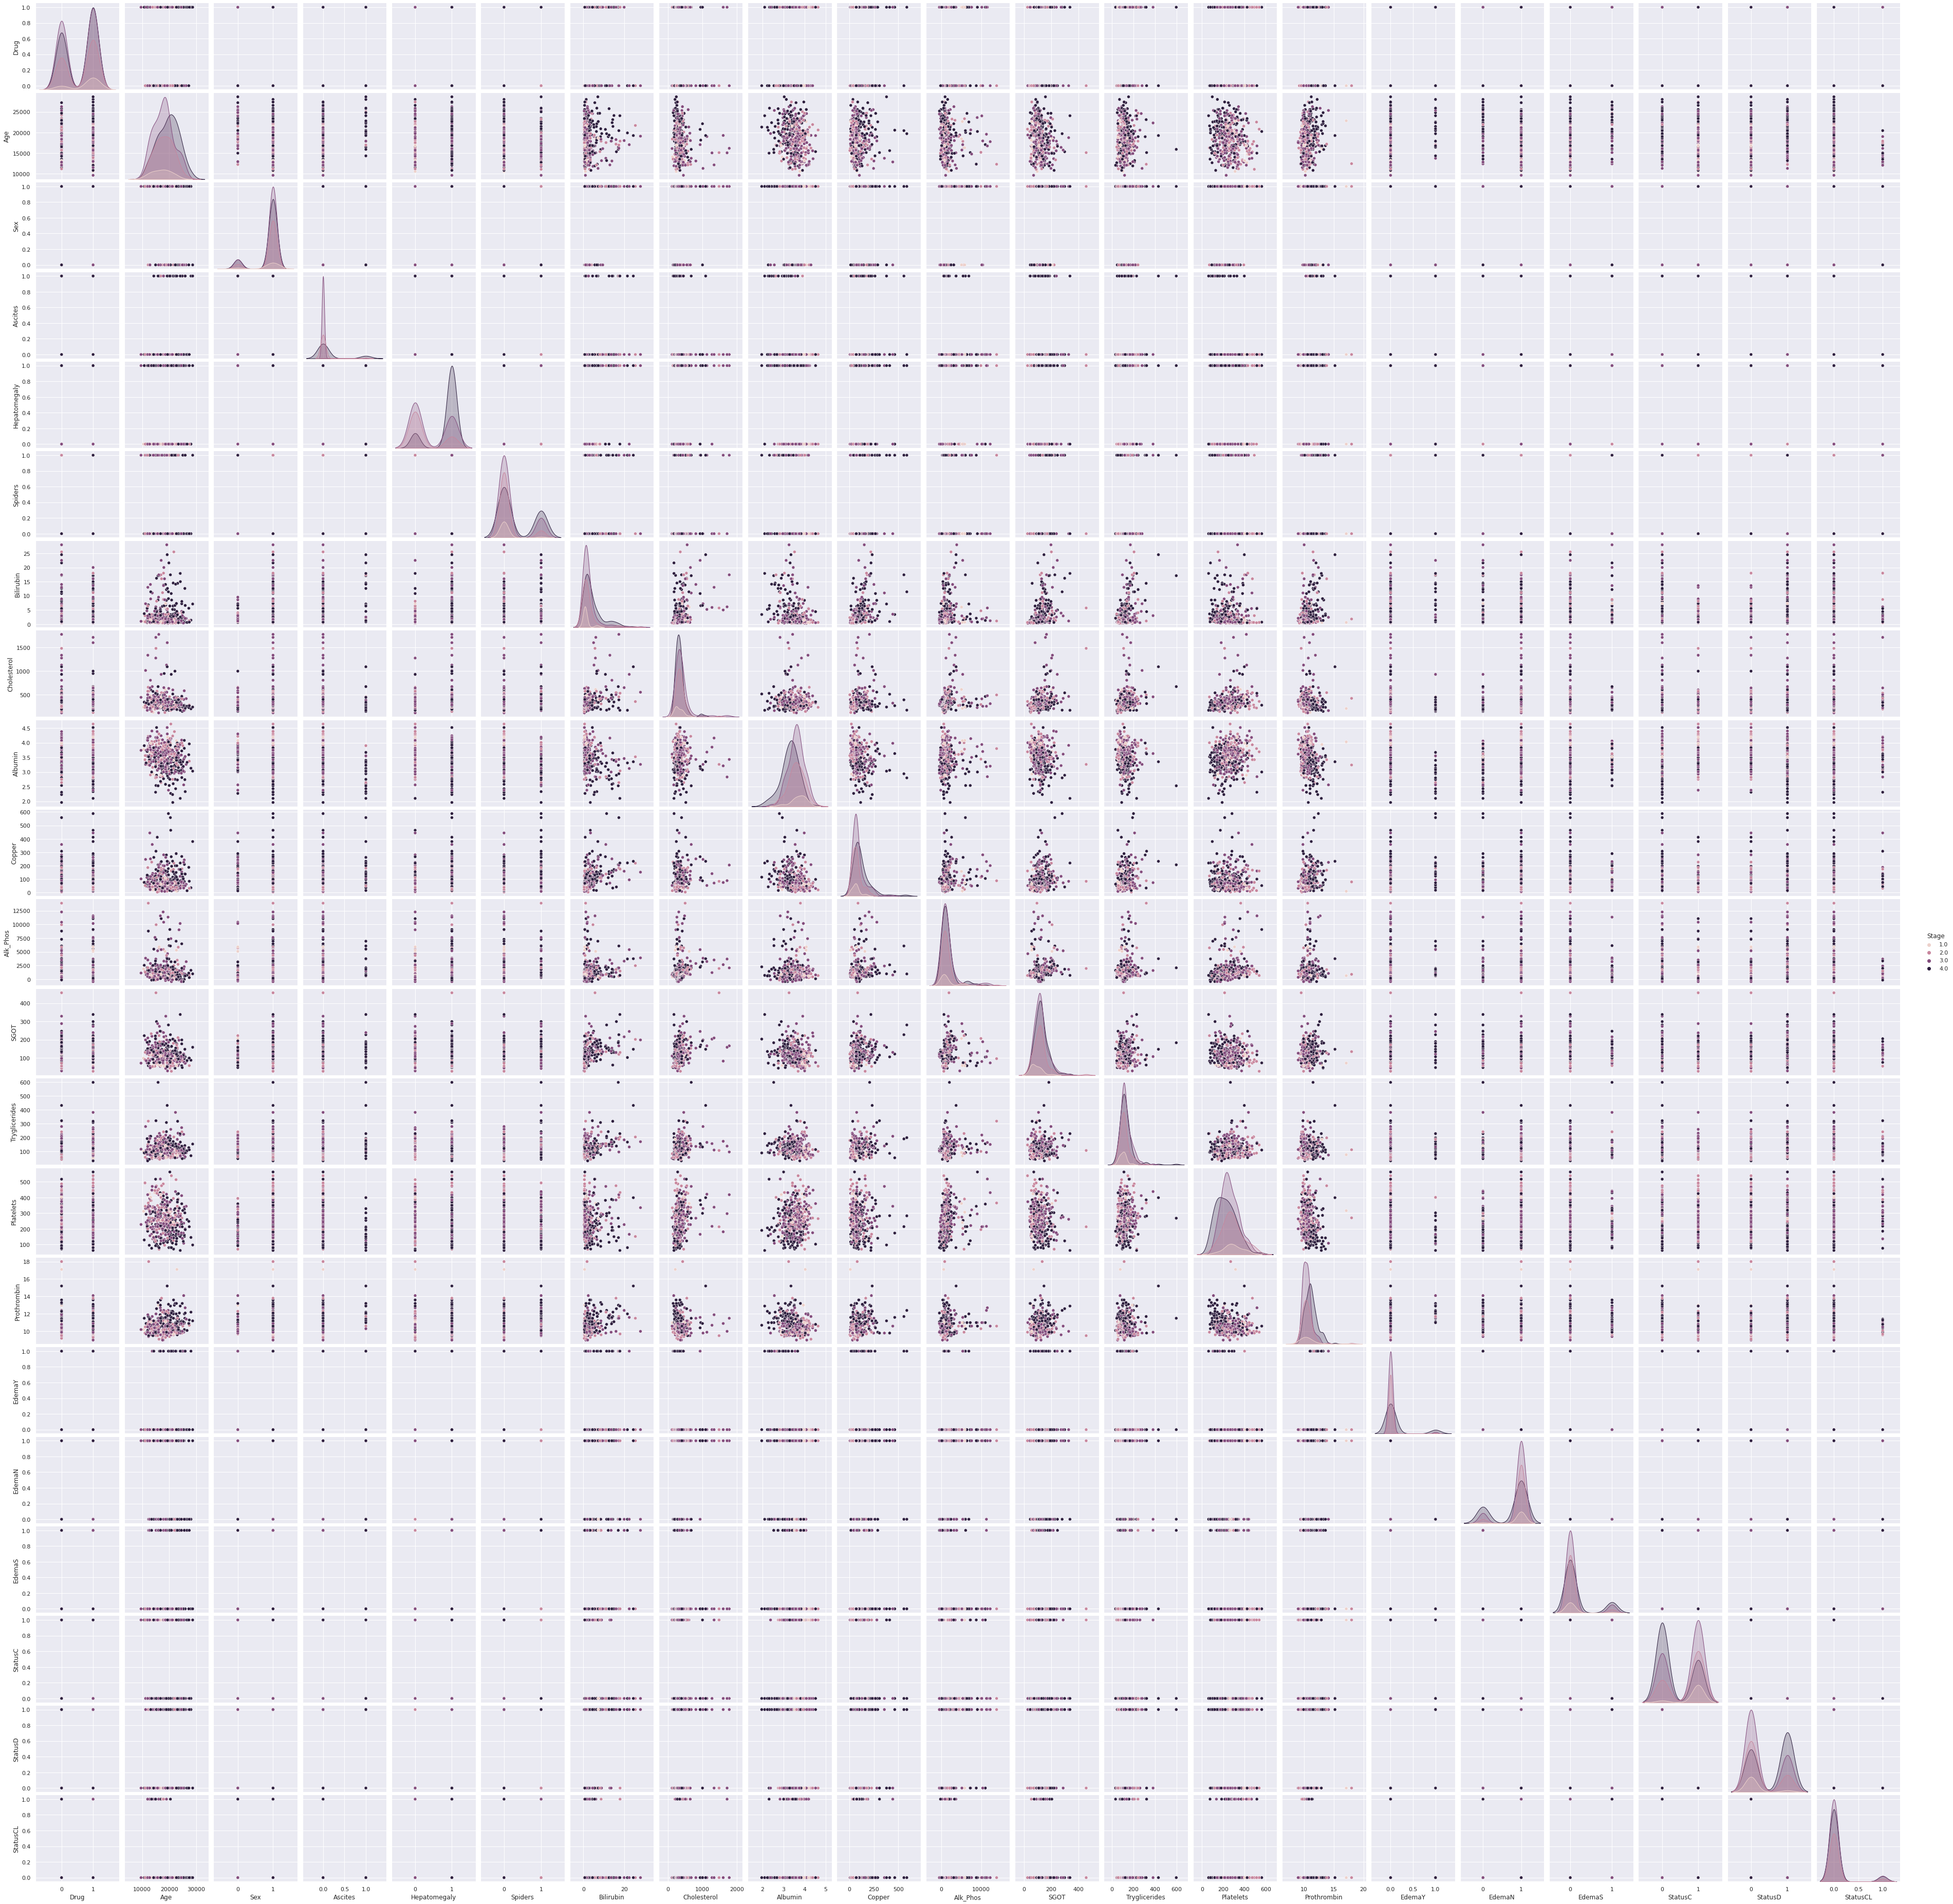

In [ ]:
sns.pairplot(data = imputed_data, hue = 'Stage')

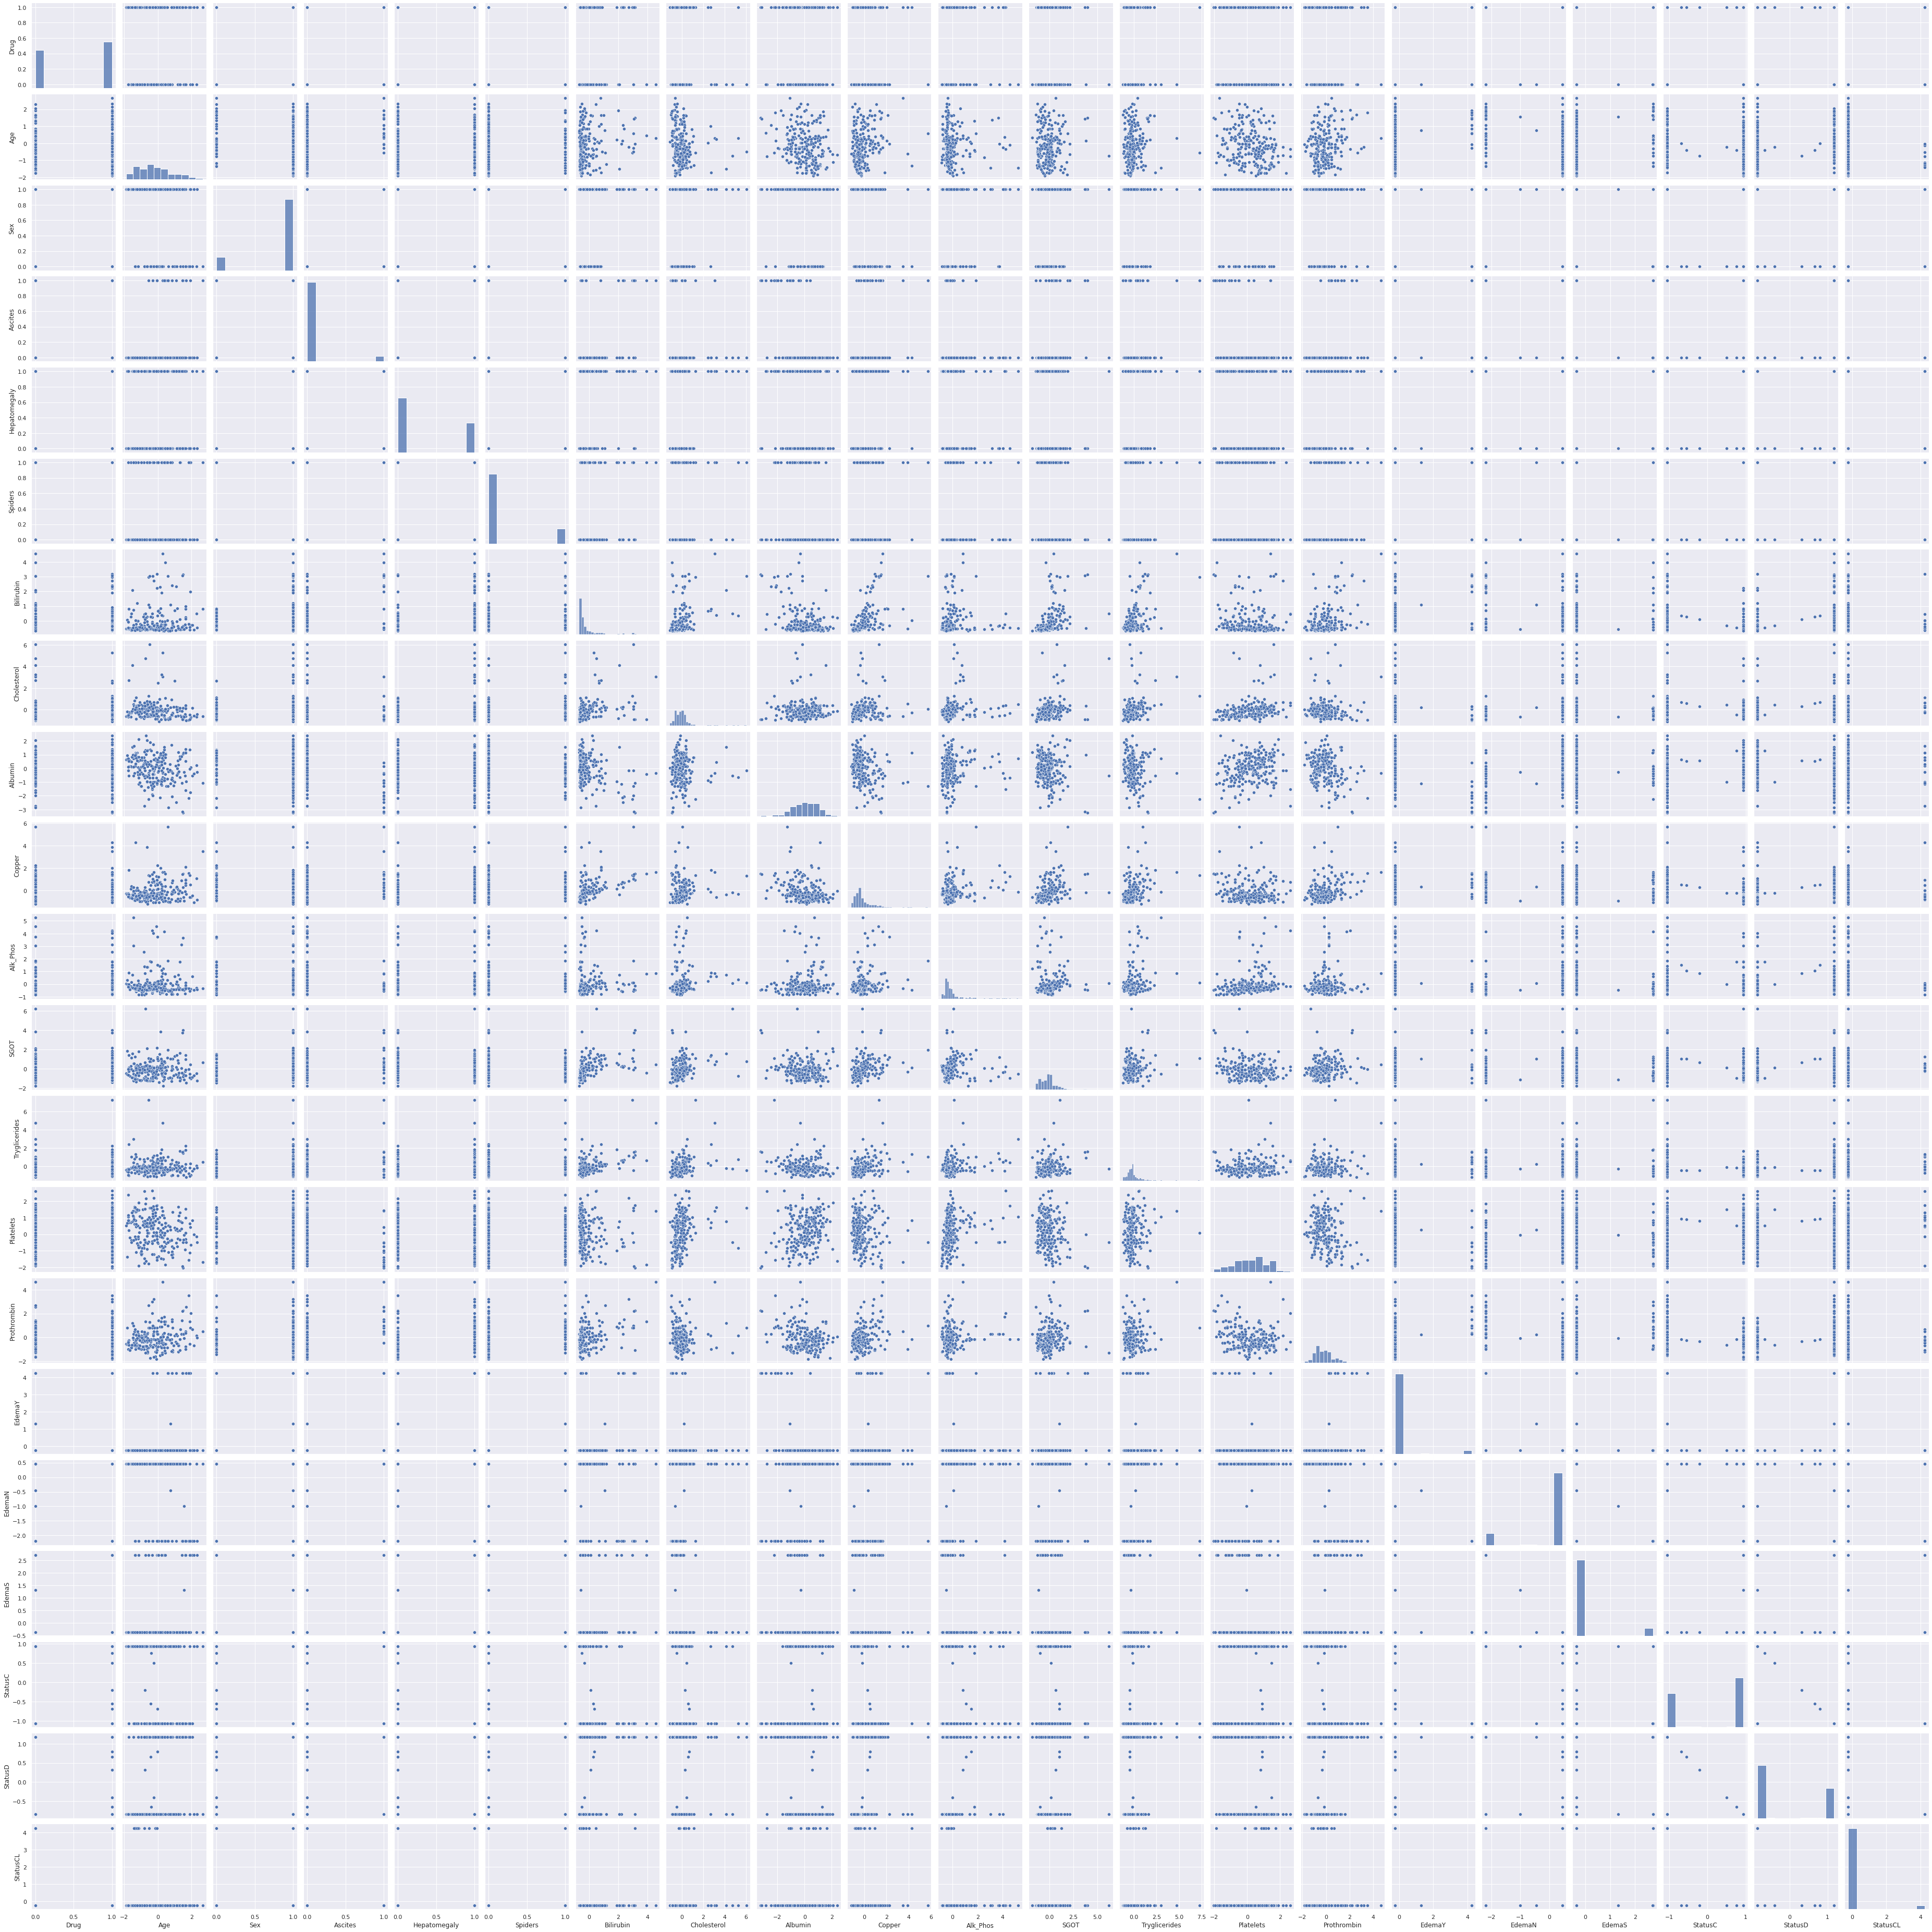

In [ ]:
sns.pairplot(X_train_resampled)